In [1]:
%matplotlib inline


Gradient descent
==================

An example demoing gradient descent by creating figures that trace the
evolution of the optimizer.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import sys, os
sys.path.append(os.path.abspath('helper'))
from cost_functions import mk_quad, mk_gauss, rosenbrock,\
    rosenbrock_prime, rosenbrock_hessian, LoggingFunction,\
    CountingFunction

x_min, x_max = -1, 2
y_min, y_max = 2.25/3*x_min - .2, 2.25/3*x_max - .2

A formatter to print values on contours



In [2]:
def super_fmt(value):
    if value > 1:
        if np.abs(int(value) - value) < .1:
            out = '$10^{%.1i}$' % value
        else:
            out = '$10^{%.1f}$' % value
    else:
        value = np.exp(value - .01)
        if value > .1:
            out = '%1.1f' % value
        elif value > .01:
            out = '%.2f' % value
        else:
            out = '%.2e' % value
    return out

A gradient descent algorithm
do not use: its a toy, use scipy's optimize.fmin_cg



In [3]:
def gradient_descent(x0, f, f_prime, hessian=None, adaptative=False):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if adaptative:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = optimize.line_search(f, f_prime,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)
            step = step[0]
            if step is None:
                step = 0
        else:
            step = 1
        x_i += - step*dx_i
        y_i += - step*dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


def gradient_descent_adaptative(x0, f, f_prime, hessian=None):
    return gradient_descent(x0, f, f_prime, adaptative=True)


def conjugate_gradient(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, jac=f_prime, method="CG", callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def newton_cg(x0, f, f_prime, hessian):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Newton-CG", jac=f_prime, hess=hessian, callback=store, options={"xtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def bfgs(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="BFGS", jac=f_prime, callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def powell(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Powell", callback=store, options={"ftol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def nelder_mead(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Nelder-Mead", callback=store, options={"ftol": 1e-12})
    return all_x_i, all_y_i, all_f_i

Run different optimizers on these problems. I have commented out many of the experiments, since too many graphs at one time is confusing (and also raises a complaint from Anaconda about the number of open plots). Once you have run the code once, try experimenting with different choices of algorithms.



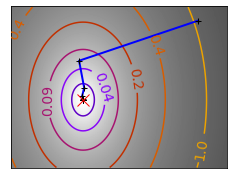

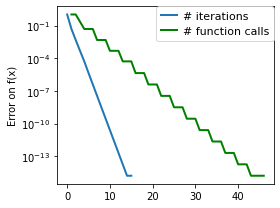

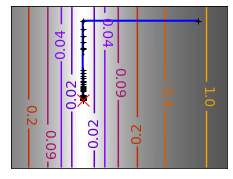

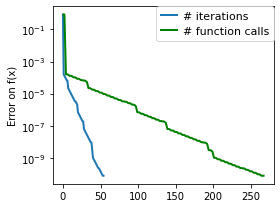

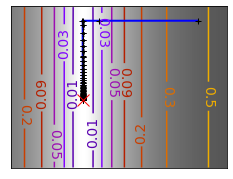

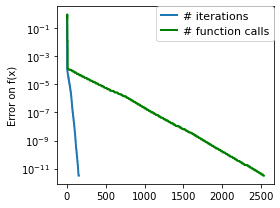

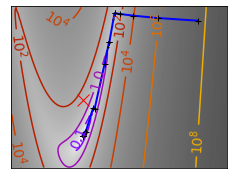

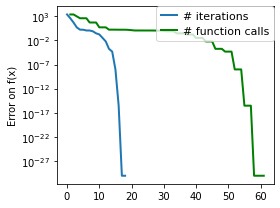

In [10]:
levels = dict()

for index, ((f, f_prime, hessian), optimizer) in enumerate((
#               (mk_quad(.7), gradient_descent),
#               (mk_quad(.7), gradient_descent_adaptative),
#                (mk_quad(.7), conjugate_gradient),
               (mk_quad(.7), newton_cg),
#               (mk_quad(.7), bfgs),
#               (mk_quad(.02), gradient_descent),
#               (mk_quad(.02), gradient_descent_adaptative),
#                (mk_gauss(.02), gradient_descent_adaptative),
#                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
#                                    gradient_descent_adaptative),
#                (mk_gauss(.02), conjugate_gradient),
#                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
#                                    conjugate_gradient),
                (mk_quad(.02), newton_cg),
                (mk_gauss(.02), newton_cg),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                                    newton_cg),
#                (mk_quad(.02), bfgs),
#                (mk_gauss(.02), bfgs),
#                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
#                            bfgs),
#                (mk_quad(.02), powell),
#                (mk_gauss(.02), powell),
#                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
#                            powell),
#                (mk_gauss(.02), nelder_mead),
#                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
#                            nelder_mead),
            )):

    # Compute a gradient-descent
    x_i, y_i = 1.6, 1.1
    counting_f_prime = CountingFunction(f_prime)
    counting_hessian = CountingFunction(hessian)
    logging_f = LoggingFunction(f, counter=counting_f_prime.counter)
    all_x_i, all_y_i, all_f_i = optimizer(np.array([x_i, y_i]),
                                          logging_f, counting_f_prime,
                                          hessian=counting_hessian)

    # Plot the contour plot
    if not max(all_y_i) < y_max:
        x_min *= 1.2
        x_max *= 1.2
        y_min *= 1.2
        y_max *= 1.2
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T

    plt.figure(index, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + .01)
    plt.imshow(log_z,
            extent=[x_min, x_max, y_min, y_max],
            cmap=plt.cm.gray_r, origin='lower',
            vmax=log_z.min() + 1.5*log_z.ptp())
    contours = plt.contour(log_z,
                        levels=levels.get(f, None),
                        extent=[x_min, x_max, y_min, y_max],
                        cmap=plt.cm.gnuplot, origin='lower')
    levels[f] = contours.levels
    plt.clabel(contours, inline=1,
                fmt=super_fmt, fontsize=14)

    plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
    plt.plot(all_x_i, all_y_i, 'k+')

    plt.plot(logging_f.all_x_i, logging_f.all_y_i, 'k.', markersize=2)

    plt.plot([0], [0], 'rx', markersize=12)


    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.draw()

    plt.figure(index + 100, figsize=(4, 3))
    plt.clf()
    plt.semilogy(np.maximum(np.abs(all_f_i), 1e-30), linewidth=2,
                label='# iterations')
    plt.ylabel('Error on f(x)')
    plt.semilogy(logging_f.counts,
                np.maximum(np.abs(logging_f.all_f_i), 1e-30),
                linewidth=2, color='g', label='# function calls')
    plt.legend(loc='upper right', frameon=True, prop=dict(size=11),
              borderaxespad=0, handlelength=1.5, handletextpad=.5)
    plt.tight_layout()
    plt.draw()